<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/M%C3%A9todo_colocacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodo de Colocacion.**

*Aplicando el metodo visto en clase, resolvemos:*

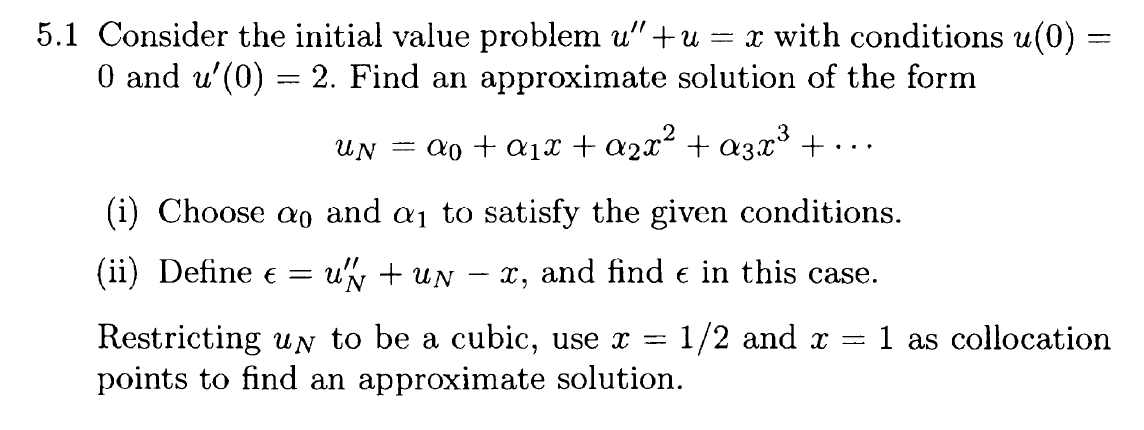

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

***Analitica***

In [3]:
x, a, b = sp.symbols('x a b')
x= sp.symbols ('x') #Introducción
u =sp.Function('u')#Definición

In [4]:
ode = u(x).diff(x,x) +u(x)- x
sp.dsolve( ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [6]:
#Condiciones
sol =sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x,0):2})
print(sol)
u_expr = sol.rhs #Parte derecha de la sol
u_num = sp.lambdify(x,u_expr)

Eq(u(x), x + sin(x))


*Grafica*


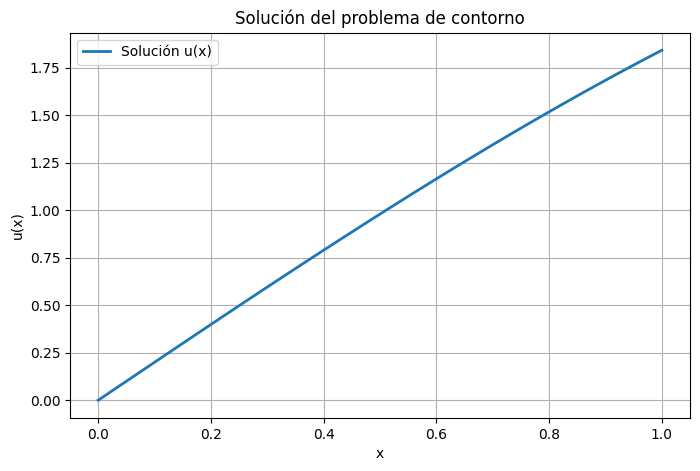

In [7]:
xx = np.linspace(0,1,100)
yy= u_num(xx)

plt.figure (figsize=(8,5))
plt.plot (xx,yy, label = "Solución u(x)", linewidth =2)
plt.title("Solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

***Numerica***

In [10]:
alpha_0 = 0
alpha_1 = 2
u_n = alpha_0 + alpha_1 * x +a * x**2 + b * x**3 #Función de prueba
print(u_n)

u_n_2 = sp.diff(u_n, x, 2)
E= u_n_2 + u_n - x
print(E)

E.simplify()

a*x**2 + b*x**3 + 2*x
a*x**2 + b*x**3 + x + 2*(a + 3*b*x)


a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [11]:
points=[sp.Rational(1,2),sp.Rational(1)]
print('Puntos de colocación:' ,points)

Puntos de colocación: [1/2, 1]


In [14]:
eqs=[sp.Eq(E.subs(x,p),0) for p in points]
#Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

a_val = sol_1[a]
b_val = sol_1[b]

print(f" a2={a_val}, a3={b_val}")



 a2=-1/17, a3=-2/17


In [15]:
for eq in eqs:
 sp.pprint(eq)

9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0
